#### - Assignment 6 Anna Feldman

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

/var/folders/sf/whvty1j57cxcxs3t3mhwbcgh0000gn/T/ipykernel_33120/2854953054.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read this CSV into a DataFrame called df and view the first few rows.

In [2]:
url="data/citibike_sample_boros.csv"

In [3]:
df = pd.read_csv(url)
df.head()

,starttime,hour,day,usertype,gender,age,tripduration_minutes,distance_miles,start_boro,end_boro
0,2020-10-27 16:51:37.994,16,Tuesday,Subscriber,male,37,21.816667,3.047236,Manhattan,Manhattan
1,2020-10-09 19:46:12.616,19,Friday,Subscriber,male,24,25.883333,1.418907,Manhattan,Manhattan
2,2020-10-10 15:19:17.455,15,Saturday,Subscriber,female,36,7.283333,0.502512,Brooklyn,Brooklyn
3,2020-10-28 01:30:42.644,1,Wednesday,Subscriber,male,31,24.833333,0.633161,Brooklyn,Brooklyn
4,2020-10-11 16:48:46.773,16,Sunday,Subscriber,male,42,19.633333,1.002208,Brooklyn,Brooklyn


#### 2a - Let x = an array of trip durations from Subscribers, and let y = an array of trip durations from Customers. Calculate the mean of x and the mean of y.

In [4]:
condition = df['usertype'] == 'Subscriber'
subsc_df = df[condition]

In [5]:
condition2 = df['usertype'] == 'Customer'
cust_df = df[condition2]

In [6]:
x = subsc_df['tripduration_minutes']
y = cust_df['tripduration_minutes']
type(x)

pandas.core.series.Series

In [7]:
x

0         21.816667
1         25.883333
2          7.283333
3         24.833333
4         19.633333
            ...    
499988     8.916667
499991    15.683333
499993     6.300000
499998    13.200000
499999    45.650000
Name: tripduration_minutes, Length: 374976, dtype: float64

In [8]:
np.mean(x)

15.53193888853331

In [9]:
np.mean(y)

22.699227881580065

#### 2b - Perform a two-sided t-test using stats.ttest_ind(x, y). Clearly state the null hypothesis and alternative hypothesis for this test. Report the resulting t-statistic and p-value. Based on the p-value obtained, do we reject the null hypothesis in favor of the alternative hypothesis?

Null hypothesis: Trip durations on average are the same across both usertypes. /
Alternative hypothesis: Trip durations on average are different across the two usertypes: one is higher or lower than the other.

In [10]:
stats.ttest_ind(x,y)

TtestResult(statistic=-153.8859949481218, pvalue=0.0, df=499998.0)

#### Reject the null because of the p value of 0. These values could not have come from the sample if the null were true. Because this is two sided we cannot know which way the alternative hypothesis goes, but we know that the trip durations are different across the two usertypes.

#### 2c - Perform a one-sided t-test using stats.ttest_ind(x, y, alternative='less'). Clearly state the null hypothesis and alternative hypothesis for this test. Report the resulting t-statistic and p-value. Based on the p-value obtained, do we reject the null hypothesis in favor of the alternative hypothesis?
Null hypothesis: Trip durations on average are the same across both usertypes. / Alternative hypothesis: Trip durations in the x (Subscriber) group are lower on average than the y (Customer) group.

In [11]:
stats.ttest_ind(x,y, alternative = 'less')

TtestResult(statistic=-153.8859949481218, pvalue=0.0, df=499998.0)

#### Reject the null in favor of the alternative because of the p value of 0. These values could not have come from the sample if the null were true and must come from the alternative that x is less than y.

#### 2d - The t-test assumes that x and y are drawn from normally-distributed populations. Determine whether this is an appropriate assumption by running stats.normaltest() on x and y (separately). Based on the p-values obtained, determine whether x and y are drawn from a normally-distributed population. Given this result, is a t-test an appropriate test to use in this situation?


In [12]:
stats.normaltest(x)

NormaltestResult(statistic=235837.77265996154, pvalue=0.0)

In [13]:
stats.normaltest(y)

NormaltestResult(statistic=79523.59976336165, pvalue=0.0)

#### Since the null hypothesis of this test is that the sample is normally distributed and the alternative is that it is not, this p value of 0 means we reject the null and learn that neither of these are normally distributed. T-tests are not appropriate in this situation.

#### 2e - Perform a one-sided Mann Whitney U test with stats.mannwhitneyu(x, y, alternative='less'). Clearly state the null hypothesis and alternative hypothesis for this test. Report the resulting U-statistic and p-value. Based on the p-value obtained, do we reject the null hypothesis in favor of the alternative hypothesis?
Null hypothesis: Trip durations are the same across both usertypes. / Alternative hypothesis: Trip durations in the x (Subscriber) group are less than the y (Customer) group.

In [14]:
stats.mannwhitneyu(x,y, alternative ='less') 

MannwhitneyuResult(statistic=16611093589.5, pvalue=0.0)

#### Reject the null in favor of the alternative because of the p value of 0. These values could not have come from the sample if the null were true and must come from the alternative that x is less than y.

#### 3a - Let x = an array of trip durations for trips that start in Brooklyn from users having usertype = Customer, and let y = an array of trip durations for trips that start in Queens from users having usertype = Customer. Calculate the mean and median of x, and the mean and median of y.

In [15]:
condition3 = (df['usertype'] == 'Customer') & (df['start_boro'] == 'Brooklyn')
newx_df = df[condition3]
x = newx_df['tripduration_minutes']
type(x)

pandas.core.series.Series

In [16]:
condition4 = (df['usertype'] == 'Customer') & (df['start_boro'] == 'Queens')
newy_df = df[condition4]
y = newy_df['tripduration_minutes']

In [17]:
np.mean(x)

21.955716883433674

In [18]:
np.median(x)

17.8

In [19]:
np.mean(y)

21.91483316133471

In [20]:
np.median(y)

16.983333333333334

#### 3b- Perform a two-sided t-test between x and y. Clearly state the null and alternative hyptheses for the test, and interpret the results. Based on the resulting p-value, would you reject the null hypothesis or not?
Null hypothesis: Trip durations are the same across both usertypes. / Alternative hypothesis: Trip durations in the x (Subscriber) group are different (greater OR less than) the y (Customer) group.

In [21]:
stats.ttest_ind(x,y)

TtestResult(statistic=0.14875848407479839, pvalue=0.8817450702930821, df=34906.0)

#### Cannot reject the null in this case. P value is high at .88, close to the maximum value of 1, meaning that if the null were true, you would be highly likely, but not certain, to get a sample that looks like this one.

#### 3c - As we know, the t-test assumes that x and y are drawn from normally distributed populations. Plot a histogram of x and another histogram of y. Do x and y look normally distributed? Confirm your conclusion by running a statistical test for normality in both x and y. Based on the results, is a t-test appropriate in this situation?

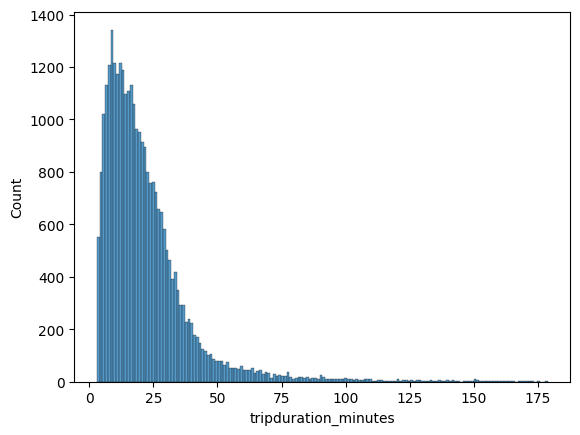

In [22]:
sns.histplot(x);

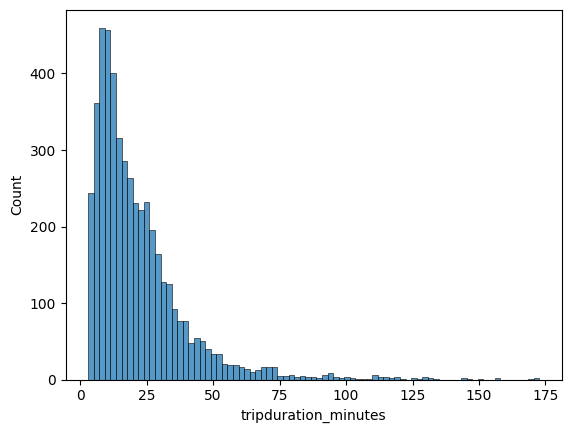

In [23]:
sns.histplot(y);

In [24]:
stats.normaltest(x)

NormaltestResult(statistic=19751.950808189416, pvalue=0.0)

In [25]:
stats.normaltest(y)

NormaltestResult(statistic=2884.227390614744, pvalue=0.0)

####  Neither x nor y looks normally distributed; they both are right skewed in the resulting histograms. The normality test confirms this and makes it clear that T-tests are not appropriate in this situation. The null hypothesis of the normality test is that the sample is normally distributed and the alternative is that it is not, so the resulting p values of 0 means we reject the null and learn that neither of these values are normally distributed. 

#### 3d - Perform a two-sided Mann-Whitney U test on x and y. Clearly state the null and alternative hypothesis of this test. Based on the results of this test, what do you conclude about x and y?
Null hypothesis: Trip durations are the same across both usertypes. / Alternative hypothesis: Trip durations in the x (Subscriber) group are different (less than or greater than) the y (Customer) group.

In [26]:
stats.mannwhitneyu(x,y) 

MannwhitneyuResult(statistic=74729121.5, pvalue=0.0034872532172883163)

#### 3e - Is your conclusion drawn from the Mann-Whitney U test in 3d) different than your conclusion drawn from the t-test in 3b)? If so, why might that be?

Yes, the p value is very close to 0 in this result, almost the complete opposite of the p value result at .88 in 3b. This 0 result leads us to be confident in rejecting the null for the alternative, although we have not specified the alternative of x being less than versus greater than y. It appears that assuming that the x and y data was normally distributed changed the resulting statistic in 3b and did not allow us to get an accurate result based on our alternative hypothesis.